# Exploración visual

Images shape:  (416, 512, 192)
Segmentation shape:  (416, 512, 192)
===== IMAGE HEADER =====
OrderedDict([('type', 'unsigned short'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([416, 512, 192])), ('space directions', array([[ 0.46754257, -0.01235864,  0.03126937],
       [ 0.01877845,  0.45759081, -0.09992287],
       [-0.05533472,  0.20022162,  0.90650392]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([ -97.39358329, -146.91877982,  -70.62247699]))])
===== MASK HEADER =====
OrderedDict([('type', 'unsigned char'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([416, 512, 192])), ('space directions', array([[ 0.46754257, -0.01235864,  0.03126937],
       [ 0.01877845,  0.45759081, -0.09992287],
       [-0.05533472,  0.20022162,  0.90650392]])), ('kinds', ['domain', 'domain', 'domain']), ('encoding', 'gzip'), ('space origin', array([ -97.39358329, -146.91877982,  -70.

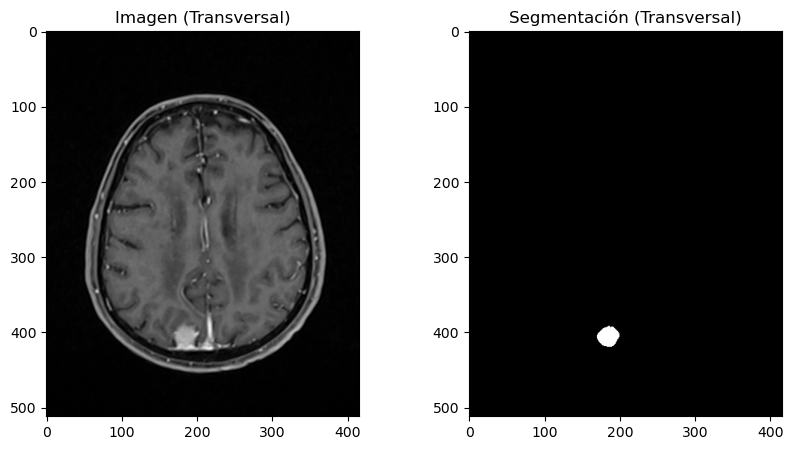

In [1]:
import numpy as np
import nrrd
import os
import matplotlib.pyplot as plt

# Definimos la ruta base del dataset
base_ds_path = "/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS"
patient = '1'

# Ruta a las imágenes y las segmentaciones
rm_basepath = os.path.join(base_ds_path, patient, 'RM')
t1 = os.path.join(rm_basepath, 'T1')
    
# Leemos las imágenes y las máscaras
images, header_slices = nrrd.read(os.path.join(t1, '13 t1_mpr_tra_iso_fs.nrrd'))
masks, header_masks = nrrd.read(os.path.join(t1, 'Segmentation.seg.nrrd'))

print("Images shape: ", images.shape)
print("Segmentation shape: ", masks.shape)

print("===== IMAGE HEADER =====")
print(header_slices)
print("===== MASK HEADER =====")
print(header_masks)

slice_index = 120

# Reorganizamos los ejes de los datos para obtener el corte transversal
images_reordered = np.transpose(images, (2, 1, 0))
masks_reordered = np.transpose(masks, (2, 1, 0))

# Visualizamos los datos reordenados
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(images_reordered[slice_index, :, :], cmap='gray')
axes[1].imshow(masks_reordered[slice_index, :, :], cmap='gray')
axes[0].set_title('Imagen (Transversal)')
axes[1].set_title('Segmentación (Transversal)')
plt.show()


## Imagen sin una resolución correcta entre máscara y corte

Images shape:  (512, 512, 352)
Segmentation shape:  (512, 512, 144)
===== IMAGE HEADER =====
OrderedDict([('type', 'short'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([512, 512, 352])), ('space directions', array([[ 0. ,  0.5,  0. ],
       [ 0. ,  0. , -0.5],
       [-0.5,  0. ,  0. ]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([  92.5       , -166.26499939,  121.77300262]))])
===== MASK HEADER =====
OrderedDict([('type', 'short'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([512, 512, 144])), ('space directions', array([[ 0.49955827,  0.01873253, -0.00951995],
       [-0.0192785 ,  0.49870709, -0.03032456],
       [ 0.01671857,  0.06133016,  0.99798587]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'raw'), ('space origin', array([-117.23699951, -167.81300354,  -28.31080055]))])


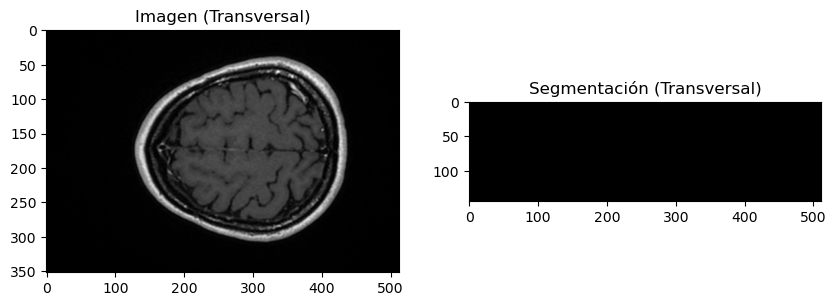

In [10]:
# Definimos la ruta base del dataset
base_ds_path = "/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS"
patient = '36'

# Ruta a las imágenes y las segmentaciones
rm_basepath = os.path.join(base_ds_path, patient, 'RM')
t1 = os.path.join(rm_basepath, 'T1')
    
# Leemos las imágenes y las máscaras
images, header_slices = nrrd.read(os.path.join(t1, '9 Sag CUBE T1 GAD.nrrd'))
masks, header_masks = nrrd.read(os.path.join(t1, 'Segmentation.nrrd'))

print("Images shape: ", images.shape)
print("Segmentation shape: ", masks.shape)

print("===== IMAGE HEADER =====")
print(header_slices)
print("===== MASK HEADER =====")
print(header_masks)


slice_index = 90

# Reorganizamos los ejes de los datos para obtener el corte transversal
images_reordered = np.transpose(images, (1, 2, 0))
masks_reordered = np.transpose(masks, (1, 2, 0))

# Visualizamos los datos reordenados
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(images_reordered[slice_index, :, :], cmap='gray')
axes[1].imshow(masks_reordered[7, :, :], cmap='gray')
axes[0].set_title('Imagen (Transversal)')
axes[1].set_title('Segmentación (Transversal)')
plt.show()



Images shape:  (512, 512, 328)
Segmentation shape:  (512, 512, 328)
===== IMAGE HEADER =====
OrderedDict([('type', 'short'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([512, 512, 328])), ('space directions', array([[ 0. ,  0.5,  0. ],
       [ 0. ,  0. , -0.5],
       [-0.5,  0. ,  0. ]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([  80.91429901, -165.602005  ,  114.74199677]))])
===== MASK HEADER =====
OrderedDict([('type', 'short'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([512, 512, 328])), ('space directions', array([[ 0. ,  0.5,  0. ],
       [ 0. ,  0. , -0.5],
       [-0.5,  0. ,  0. ]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'raw'), ('space origin', array([  80.91429901, -165.602005  ,  114.74199677]))])


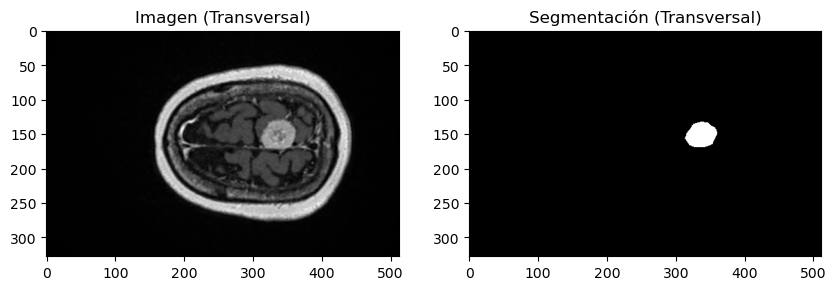

In [59]:
# Definimos la ruta base del dataset
base_ds_path = "/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS"
patient = '35'

# Ruta a las imágenes y las segmentaciones
rm_basepath = os.path.join(base_ds_path, patient, 'RM')
t1 = os.path.join(rm_basepath, 'T1')
    
# Leemos las imágenes y las máscaras
images, header_slices = nrrd.read(os.path.join(t1, '8 Sag CUBE T1 GAD.nrrd'))
masks, header_masks = nrrd.read(os.path.join('/home/mariopasc/Desktop', 'Segmentation.nrrd'))

print("Images shape: ", images.shape)
print("Segmentation shape: ", masks.shape)

print("===== IMAGE HEADER =====")
print(header_slices)
print("===== MASK HEADER =====")
print(header_masks)


slice_index = 90

# Reorganizamos los ejes de los datos para obtener el corte transversal
images_reordered = np.transpose(images, (1, 2, 0))
masks_reordered = np.transpose(masks, (1, 2, 0))

# Visualizamos los datos reordenados
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
axes[0].imshow(images_reordered[slice_index, :, :], cmap='gray')
axes[1].imshow(masks_reordered[slice_index, :, :], cmap='gray')
axes[0].set_title('Imagen (Transversal)')
axes[1].set_title('Segmentación (Transversal)')
plt.show()

In [66]:
# Definimos la ruta base del dataset
base_ds_path = "/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS"
patient = '37'

# Ruta a las imágenes y las segmentaciones
rm_basepath = os.path.join(base_ds_path, patient, 'RM')
t1 = os.path.join(rm_basepath, 'T1')
    
# Leemos las imágenes y las máscaras
images, header_slices = nrrd.read(os.path.join(t1, '1001 TRAGADO.nrrd'))
masks_seg, header_masks_seg = nrrd.read(os.path.join(t1, 'Segmentation.seg.nrrd'))
masks, header_masks_nrrd = nrrd.read(os.path.join(t1, 'Segmentation.nrrd'))


print("Images shape: ", images.shape)
print("Segmentation shape: ", masks.shape)

Images shape:  (384, 384, 20)
Segmentation shape:  (384, 384, 20)


In [38]:
import os
import nrrd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import affine_transform

# Definimos la ruta base del dataset
base_ds_path = "/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS"
patient = '35'

# Ruta a las imágenes y las segmentaciones
rm_basepath = os.path.join(base_ds_path, patient, 'RM')
t1 = os.path.join(rm_basepath, 'T1')
    
# Leemos las imágenes y las máscaras
images, header_slices = nrrd.read(os.path.join(t1, '8 Sag CUBE T1 GAD.nrrd'))
masks, header_masks = nrrd.read(os.path.join(t1, 'Segmentation.seg.nrrd'))

print("Images shape: ", images.shape)
print("Masks shape: ", masks.shape)

# Obtener la información del espacio de la imagen
image_space_directions = np.array(header_slices['space directions'])
image_space_origin = np.array(header_slices['space origin'])

# Obtener la información del espacio de la segmentación
seg_space_directions = np.array(header_masks['space directions'])
seg_space_origin = np.array(header_masks['space origin'])

# Obtener la extensión de la segmentación
extent = header_masks['Segment0_Extent']
extent_values = list(map(int, extent.split()))

# Crear una máscara vacía con las dimensiones de la imagen
full_mask = np.zeros(images.shape, dtype=masks.dtype)

# Insertar la máscara original en la ubicación adecuada
full_mask[extent_values[0]:extent_values[1]+1,
          extent_values[2]:extent_values[3]+1,
          extent_values[4]:extent_values[5]+1] = masks

print("Full Mask shape: ", full_mask.shape)

# Calcular la matriz de transformación
transformation_matrix = np.linalg.inv(image_space_directions) @ seg_space_directions
offset = np.linalg.inv(image_space_directions) @ (seg_space_origin - image_space_origin)

# Aplicar la transformación a la máscara completa con interpolación del orden 0
transformed_masks = affine_transform(
    full_mask, transformation_matrix, offset=offset, output_shape=images.shape, order=0, mode='constant', cval=0
)

print("Transformed Masks shape: ", transformed_masks.shape)

# Función para obtener los índices de las slices con al menos un píxel distinto de 0
def get_nonzero_slices(segmentation):
    nonzero_slices = [i for i in range(segmentation.shape[2]) if np.any(segmentation[:, :, i] != 0)]
    return nonzero_slices

# Obtener los índices de las slices con segmentaciones
nonzero_slices = get_nonzero_slices(transformed_masks)
print("Slices with nonzero pixels:", nonzero_slices)

# Función para mostrar un slice
def show_slice(image, segmentation, slice_index):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("MRI Image")
    plt.imshow(image[:, :, slice_index], cmap='gray')
    
    plt.subplot(1, 2, 2)
    plt.title("Segmentation")
    plt.imshow(image[:, :, slice_index], cmap='gray')
    plt.imshow(segmentation[:, :, slice_index], alpha=0.5, cmap='jet')
    
    plt.show()

# Mostrar un slice con segmentación no nula si existe
if nonzero_slices:
    slice_index = nonzero_slices[0]  # Mostrar el primer slice no nulo encontrado
    show_slice(images, transformed_masks, slice_index)
else:
    print("No slices with nonzero pixels found.")


Images shape:  (512, 512, 328)
Masks shape:  (48, 41, 51)
Full Mask shape:  (512, 512, 328)
Transformed Masks shape:  (512, 512, 328)
Slices with nonzero pixels: []
No slices with nonzero pixels found.


# Conversión a formato .npz

In [73]:
# Definimos la ruta base del dataset
base_ds_path = "/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS"
patient = '1'

# Ruta a las imágenes y las segmentaciones
rm_basepath = os.path.join(base_ds_path, patient, 'RM')
sequences = [os.path.join(rm_basepath, seq) for seq in os.listdir(rm_basepath)]

# Creación de los conjuntos de datos 
npz_ds_path = os.path.join(base_ds_path, '../..', 'npz_dataset')
os.makedirs(npz_ds_path, exist_ok=True)
for seq in sequences:
    os.makedirs(os.path.join(npz_ds_path, os.path.basename(seq)), exist_ok=True)
    print(f'{os.path.basename(seq)} path: {os.path.join(npz_ds_path, os.path.basename(seq))}')

for seq in sequences:
    nrrd_files = [os.path.join(seq, file) for file in os.listdir(seq) if file.endswith('.nrrd')]
    image = [file for file in nrrd_files if os.path.basename(file) != "Segmentation.seg.nrrd"] 
    segmentation = [file for file in nrrd_files if os.path.basename(file) == "Segmentation.seg.nrrd"]

    print("Image:", image)
    print("Segmentation:", segmentation)


T1 path: /home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/../../npz_dataset/T1
T1SIN path: /home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/../../npz_dataset/T1SIN
T2 path: /home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/../../npz_dataset/T2
SUSC path: /home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/../../npz_dataset/SUSC
Image: ['/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/1/RM/T1/13 t1_mpr_tra_iso_fs.nrrd']
Segmentation: ['/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/1/RM/T1/Segmentation.seg.nrrd']
Image: ['/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/1/RM/T1SIN/2 t1_se_sag.nrrd']
Segmentation: ['/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/1/RM/T1SIN/Segmentation.seg.nrrd']
Image: ['/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/1/RM/T2/3 t2_tse_tra.nrrd']
Segmentation: ['/home/mariopasc/Python/Datasets/Meningiomas/Origi

In [52]:
# Definimos la ruta base del dataset
base_ds_path = "/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS"
patient = '1'

# Ruta a las imágenes y las segmentaciones
rm_basepath = os.path.join(base_ds_path, patient, 'RM')
t1 = os.path.join(rm_basepath, 'T1')

# Leemos las imágenes y las máscaras
images, header_slices = nrrd.read(os.path.join(t1, '13 t1_mpr_tra_iso_fs.nrrd'))
masks, header_masks = nrrd.read(os.path.join(t1, 'Segmentation.seg.nrrd'))

# Reorganizamos los ejes de los datos para obtener el corte transversal
images_reordered = np.transpose(images, (2, 1, 0))
masks_reordered = np.transpose(masks, (2, 1, 0))

# Verificamos que las dimensiones de las imágenes y las máscaras coincidan
assert images_reordered.shape == masks_reordered.shape, "Las dimensiones de las imágenes y las máscaras no coinciden"

# Creamos un tensor con una nueva dimensión para los canales
combined = np.stack((images_reordered, masks_reordered), axis=-1)

# Guardamos el tensor en un archivo .npz
output_path = os.path.join(base_ds_path, f'patient_{patient}_t1_images_masks.npz')
np.savez(output_path, combined)

print(f"Archivo guardado en: {output_path}")

Archivo guardado en: /home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/patient_1_t1_images_masks.npz


## Visualización de npz

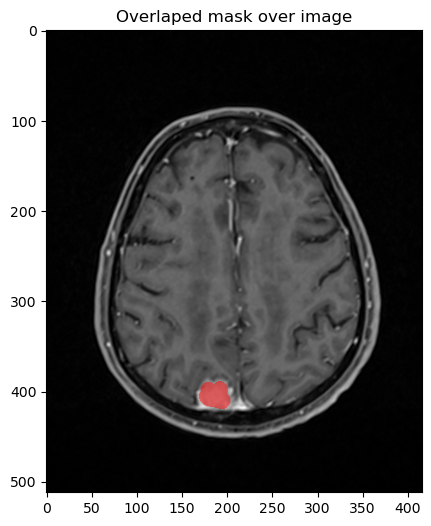

In [65]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_slice(npz_path: str, slice_index: int) -> None:
    # Cargamos los datos desde el archivo .npz
    data = np.load(npz_path)
    combined = data['arr_0']

    # Separar las imágenes y las máscaras
    images = combined[..., 0]
    masks = combined[..., 1]

    # Crear una máscara de transparencia
    alpha_mask = np.zeros_like(masks[slice_index, :, :], dtype=float)
    alpha_mask[masks[slice_index, :, :] > 0] = 0.5  # Transparencia para píxeles no cero
    alpha_mask[masks[slice_index, :, :] == 0] = 0  # Completa transparencia para píxeles cero

    # Visualizamos la imagen y la máscara superpuestas
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(images[slice_index, :, :], cmap='gray')
    red_mask = np.zeros((*masks[slice_index, :, :].shape, 4))
    red_mask[..., 0] = 1  # Rojo
    red_mask[..., 3] = alpha_mask  # Canal alpha

    ax.imshow(red_mask)
    ax.set_title('Overlaped mask over image')
    plt.show()

# Ejemplo de uso
npz_path = '/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/patient_1_t1_images_masks.npz'
slice_index = 123
visualize_slice(npz_path, slice_index)


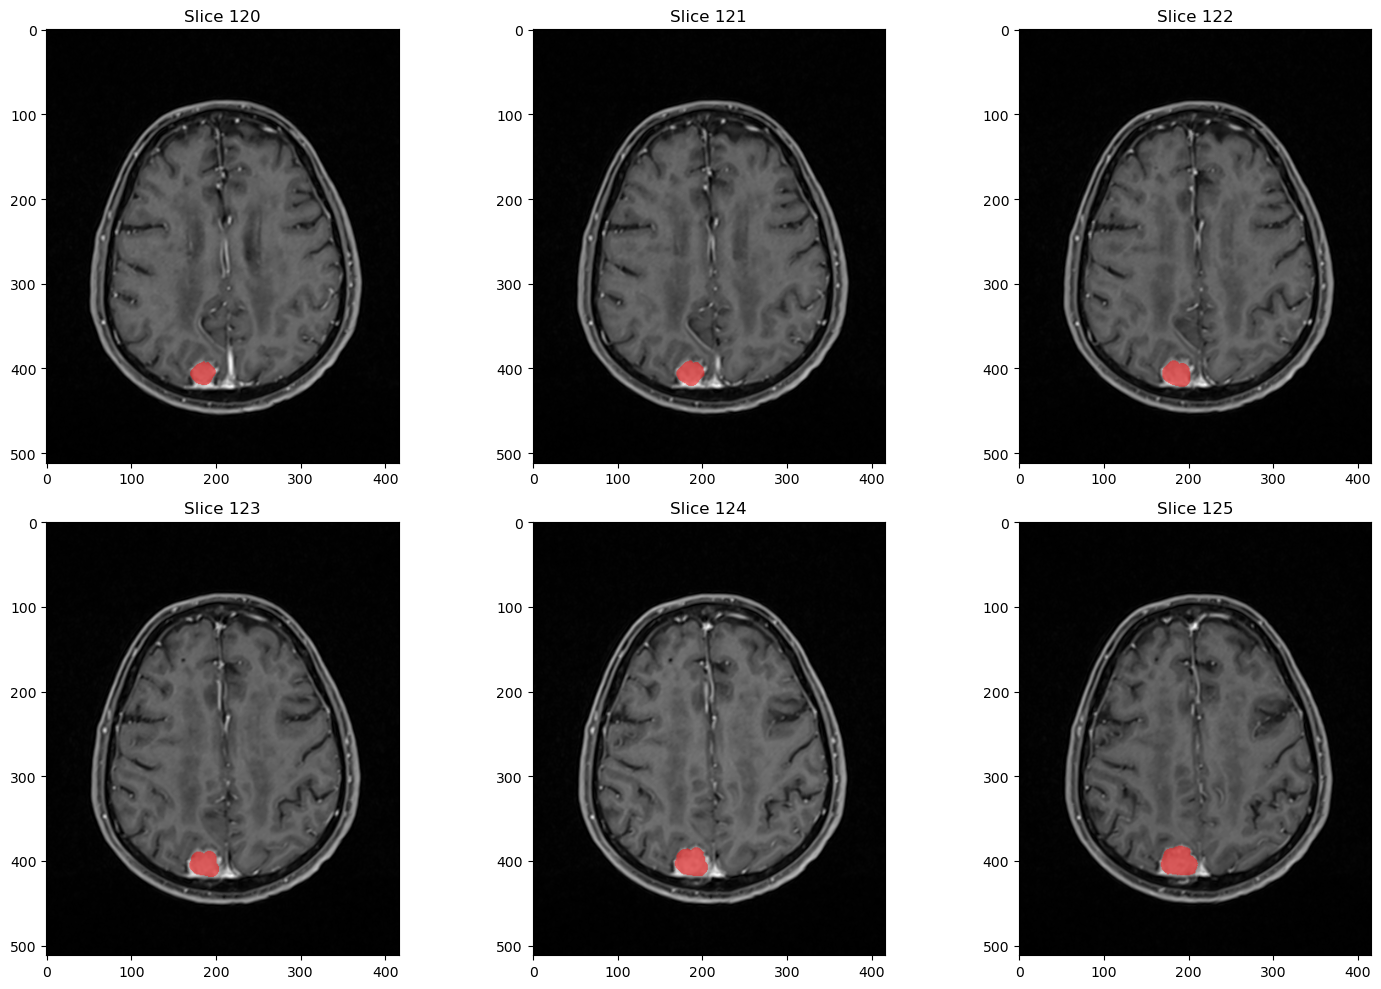

In [80]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_slices(npz_path: str, slice_indices: list) -> None:
    # Cargamos los datos desde el archivo .npz
    data = np.load(npz_path)
    combined = data['arr_0']

    # Separar las imágenes y las máscaras
    images = combined[..., 0]
    masks = combined[..., 1]

    # Configuración del subplot
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()

    for i, slice_index in enumerate(slice_indices):
        if i < 6:
            # Crear una máscara de transparencia
            alpha_mask = np.zeros_like(masks[slice_index, :, :], dtype=float)
            alpha_mask[masks[slice_index, :, :] > 0] = 0.5  # Transparencia para píxeles no cero
            alpha_mask[masks[slice_index, :, :] == 0] = 0  # Completa transparencia para píxeles cero

            # Visualizamos la imagen y la máscara superpuestas
            axes[i].imshow(images[slice_index, :, :], cmap='gray')
            red_mask = np.zeros((*masks[slice_index, :, :].shape, 4))
            red_mask[..., 0] = 1  # Rojo
            red_mask[..., 3] = alpha_mask  # Canal alpha

            axes[i].imshow(red_mask)
            axes[i].set_title(f'Slice {slice_index}')
        else:
            axes[i].axis('off')  # Apaga los ejes si no hay suficientes slices

    for j in range(len(slice_indices), 6):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Ejemplo de uso
npz_path = '/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/patient_1_t1_images_masks.npz'
slice_indices = [120, 121, 122, 123, 124, 125]
visualize_slices(npz_path, slice_indices)


## Generalización

In [3]:
import os
import numpy as np
import nrrd
import pandas as pd
from typing import Tuple

def load_nrrd_files(path: str) -> np.ndarray:
    """
    Load NRRD file from the given path.

    Parameters:
    path (str): Path to the NRRD file.

    Returns:
    np.ndarray: Data loaded from the NRRD file.
    """
    try:
        data, header = nrrd.read(path)
        return data
    except Exception as e:
        raise IOError(f"Error loading NRRD file {path}: {e}")

def reorganize_axes(images: np.ndarray, masks: np.ndarray) -> Tuple[np.ndarray, np.ndarray]:
    """
    Reorganize the axes of the given images and masks.

    Parameters:
    images (np.ndarray): Array of images.
    masks (np.ndarray): Array of masks.

    Returns:
    Tuple[np.ndarray, np.ndarray]: Reordered images and masks.
    """
    try:
        images_reordered = np.transpose(images, (2, 1, 0))
        masks_reordered = np.transpose(masks, (2, 1, 0))
        return images_reordered, masks_reordered
    except Exception as e:
        raise ValueError(f"Error reorganizing axes: {e}")

# Define the base dataset path
base_ds_path = "/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS"
patient_ids = [path for path in os.listdir(base_ds_path) if not (path.endswith('.xlsx') or 
                                                                 path.endswith('TC') or 
                                                                 path.endswith('.txt') or
                                                                 path.endswith('.csv'))]  # You can add more patient IDs as needed
# Initialize an empty list to store the data for the DataFrame
data = []

# Path to save the log file
log_file_path = "/home/mariopasc/Python/Datasets/Meningiomas/Original/MENINGIOMAS/log.txt"

# Open the log file
with open(log_file_path, 'w') as log_file:

    # Process each patient
    for patient_id in patient_ids:
        rm_basepath = os.path.join(base_ds_path, patient_id, 'RM')
        sequences = [os.path.join(rm_basepath, seq) for seq in os.listdir(rm_basepath)]

        # Process each sequence
        for seq in sequences:
            try:
                sequence_type = os.path.basename(seq)
                nrrd_files = [os.path.join(seq, file) for file in os.listdir(seq) if file.endswith('.nrrd')]
                image_path = [file for file in nrrd_files if os.path.basename(file) != "Segmentation.seg.nrrd"][0]
                mask_path = [file for file in nrrd_files if os.path.basename(file).startswith('Segmentation')][0]

                # Load images and masks
                images = load_nrrd_files(image_path)
                masks = load_nrrd_files(mask_path)

                # Log original shapes
                log_file.write(f"Sequence: {sequence_type}\n")
                log_file.write(f"Original image shape: {images.shape}\n")
                log_file.write(f"Original mask shape: {masks.shape}\n")

                # Reorganize axes
                images_reordered, masks_reordered = reorganize_axes(images, masks)

                # Log reorganized shapes
                log_file.write(f"Reorganized image shape: {images_reordered.shape}\n")
                log_file.write(f"Reorganized mask shape: {masks_reordered.shape}\n")

                # Check if shapes match
                shapes_match = images_reordered.shape == masks_reordered.shape
                if not shapes_match:
                    log_file.write(f"Shapes do not match for patient {patient_id}, sequence {sequence_type}\n")

                # Append data to the list
                data.append([
                    patient_id,
                    sequence_type,
                    shapes_match,
                    images_reordered.shape[0], images_reordered.shape[1], images_reordered.shape[2],
                    masks_reordered.shape[0], masks_reordered.shape[1], masks_reordered.shape[2]
                ])

            except Exception as e:
                log_file.write(f"Error processing sequence {sequence_type} for patient {patient_id}: {e}\n")

# Create a DataFrame from the data
df = pd.DataFrame(data, columns=[
    'paciente', 'pulso', 'shapes_match?',
    'x_image', 'y_image', 'z_image',
    'x_mask', 'y_mask', 'z_mask'
])

# Save the DataFrame to a CSV file
df.to_csv(os.path.join(base_ds_path, 'log_shapes.csv'), index=False)

# Display the DataFrame
print(df)


    paciente  pulso  shapes_match?  x_image  y_image  z_image  x_mask  y_mask  \
0         70     T1           True      192      512      416     192     512   
1         70  T1SIN           True      192      512      416     192     512   
2         70     T2           True      192      512      416     192     512   
3         35     T1           True      328      512      512     328     512   
4         35  T1SIN           True      328      512      512     328     512   
..       ...    ...            ...      ...      ...      ...     ...     ...   
208       43     T1           True       23      512      512      23     512   
209       43     T2           True       24      512      512      24     512   
210       54     T1           True      140      256      256     140     256   
211       54  T1SIN           True      140      256      256     140     256   
212       54     T2           True       27      256      256      27     256   

     z_mask  
0       416  

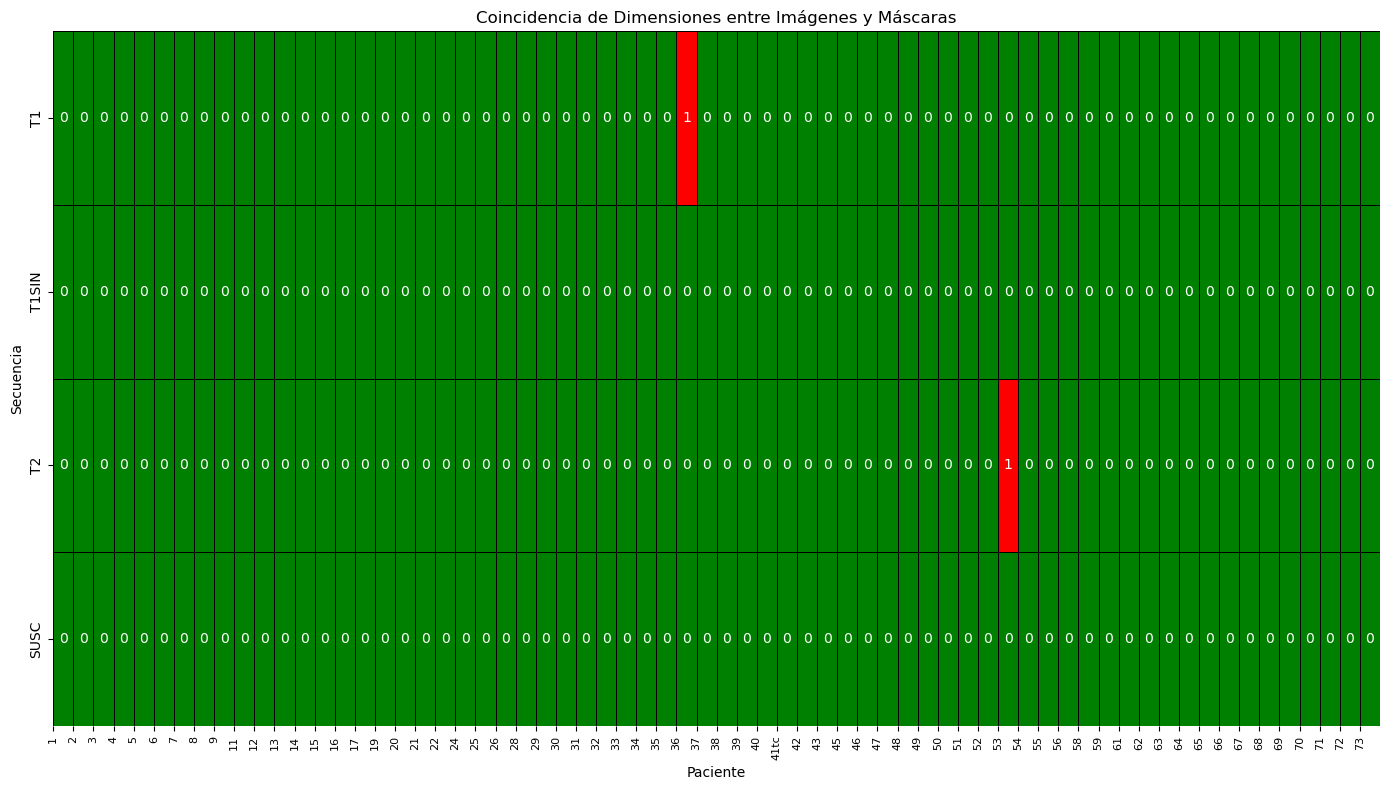

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import natsorted

# Supongamos que ya tienes el DataFrame 'df' del código anterior
# Si no es así, asegúrate de cargarlo o generarlo antes de ejecutar este código

# Definir los pacientes y las secuencias que nos interesan
patients = natsorted(df['paciente'].unique())  # Ordenar los pacientes de manera natural
sequences = ['T1', 'T1SIN', 'T2', 'SUSC']

# Crear un DataFrame vacío para almacenar los resultados del heatmap
heatmap_data = pd.DataFrame(0, index=sequences, columns=patients)

# Rellenar el DataFrame del heatmap con los datos de shapes_match?
for index, row in df.iterrows():
    patient = row['paciente']
    sequence = row['pulso']
    shapes_match = row['shapes_match?']
    
    if sequence in sequences:
        heatmap_data.loc[sequence, patient] = 0 if shapes_match else 1

# Configurar el mapa de colores para el heatmap
cmap = sns.color_palette(["green", "red"])

# Crear el heatmap
plt.figure(figsize=(14, 8))  # Ajustar tamaño de la figura
ax = sns.heatmap(heatmap_data, cmap=cmap, cbar=False, linewidths=0.5, linecolor='black', annot=True, fmt='')

# Agregar etiquetas y título
plt.xlabel('Paciente')
plt.ylabel('Secuencia')
plt.title('Coincidencia de Dimensiones entre Imágenes y Máscaras')

# Ajustar las etiquetas del eje X
plt.xticks(rotation=90, fontsize=8)  # Girar etiquetas del eje X y ajustar tamaño de fuente

# Asegurarse de que todas las etiquetas se muestran
ax.set_xticks(range(len(patients)))
ax.set_xticklabels(patients)

# Mostrar el heatmap
plt.tight_layout()
plt.show()


Falta segmentación en T1SIN de RM 43

Falta segmentación en T1SIN de RM 49

Falta segmentación en T1SIN de RM 52